In [1]:
import sys, os
sys.path.insert(0,"/dartfs-hpc/rc/home/w/f003k8w/.local/lib/python3.7/site-packages/")

In [2]:
from PIL import Image
import cv2
Image.MAX_IMAGE_PIXELS = None
import skimage.io
import numpy as np
from pathflowai.utils import generate_tissue_mask


downsample=12
compression=2
im1,im2=cv2.resize(skimage.io.imread("bcc/interactive_test/163_A1a.img.0.png"),None,fx=1./downsample,fy=1./downsample),cv2.resize(skimage.io.imread("bcc/interactive_test/163_A1b.img.1.png"),None,fx=1./downsample,fy=1./downsample) 

threshold=230


nonechucks may not work properly with this version of PyTorch (1.6.0). It has only been tested on PyTorch versions 1.0, 1.1, and 1.2


In [3]:
hole_size=2500#8000
mask1=generate_tissue_mask(im1,compression=compression,threshold=threshold, keep_holes=False, max_hole_size=hole_size)

mask2=generate_tissue_mask(im2,compression=compression,threshold=threshold, keep_holes=False, max_hole_size=hole_size)


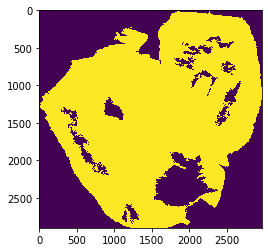

In [4]:
import matplotlib.pyplot as plt

plt.imshow(mask1)

In [5]:
from scipy.ndimage import label as scilabel
from scipy.ndimage import binary_fill_holes as fill_holes

In [6]:
# lbls=scilabel(~mask1 & fill_holes(mask1))[0]

In [7]:
# lbls.max()

In [8]:
from skimage.color import label2rgb
from skimage.measure import regionprops
from skimage.morphology import remove_small_objects

In [38]:
PC=[x.coords for x in regionprops(scilabel(remove_small_objects(~mask2 & fill_holes(mask2),1500))[0])]#.max()

In [40]:
len(PC)

30

In [39]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_diagram, plot_point_cloud, plot_heatmap
# pt_clouds=[pt_cloud,pt_cloud2]
downsample=0.05
X2=[]
for pc in PC:
    idx=np.random.choice(np.arange(len(pc)),int(downsample*len(pc)),replace=False)
    X2.append(pc[idx])#-pc[idx].min(0)
    
diagrams=VietorisRipsPersistence().fit_transform(X2)

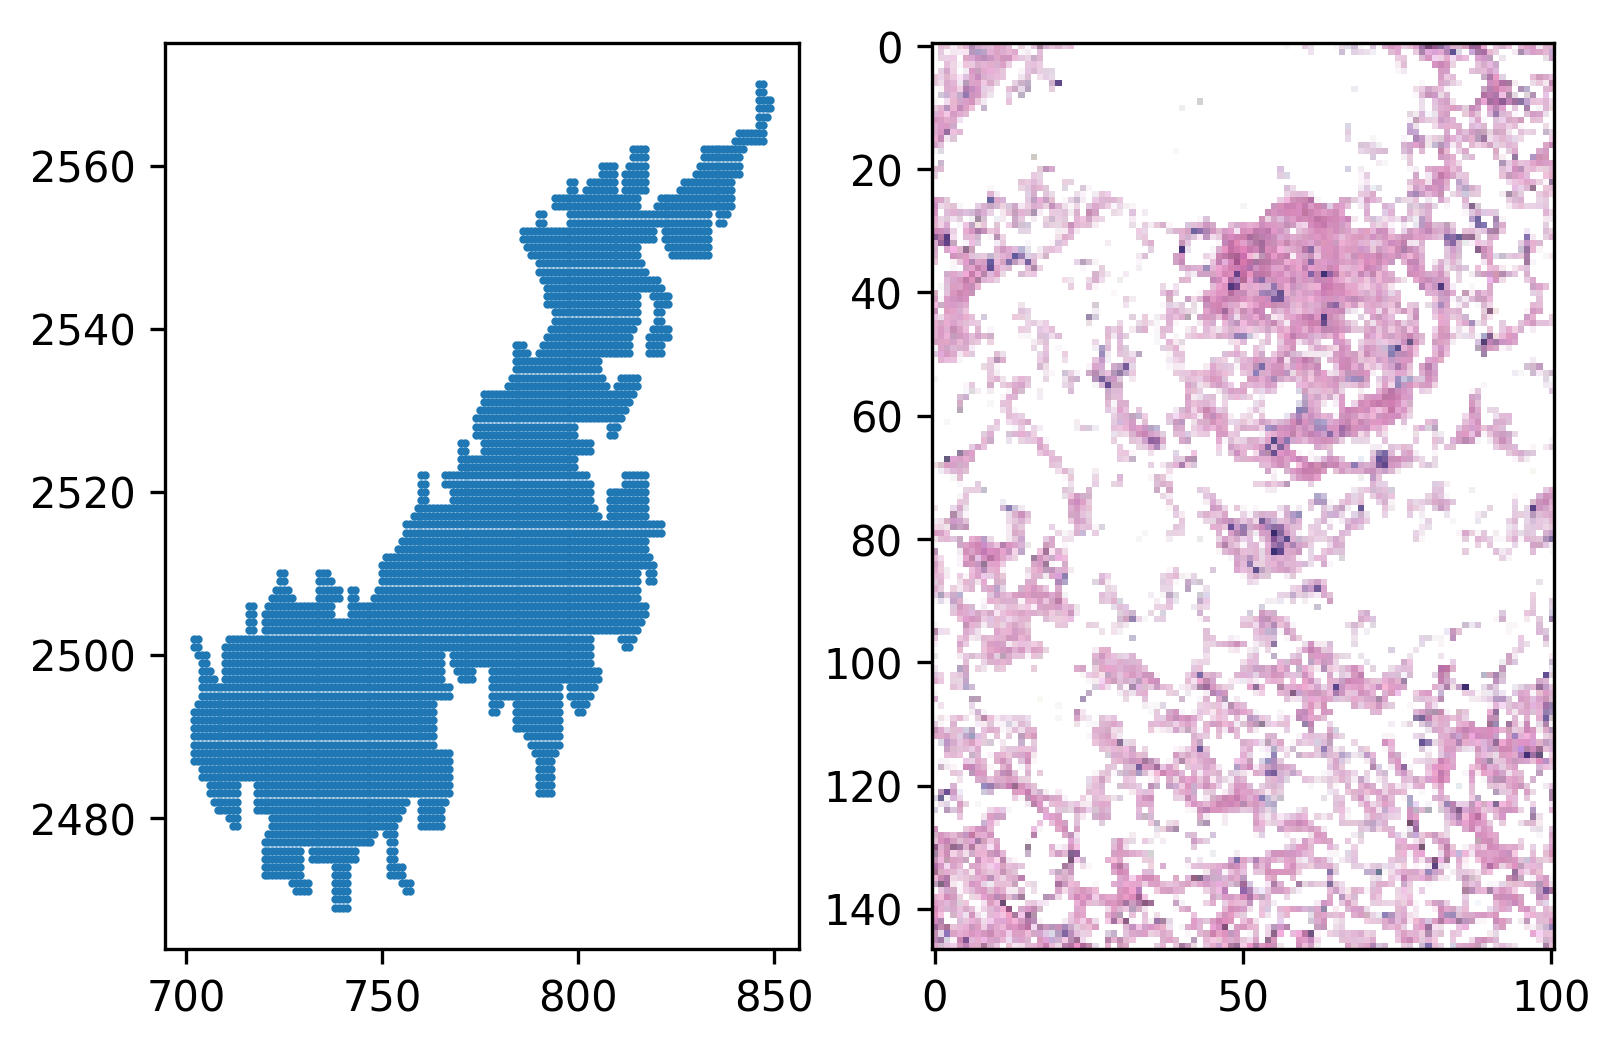

In [48]:
import matplotlib
matplotlib.rcParams['figure.dpi']=300
i=9
plot_diagram(diagrams[i])
plt.subplot(121)
plt.scatter(*PC[i].T.tolist(),s=1)
plt.subplot(122)
xmin,ymin=PC[i].min(0)
xmax,ymax=PC[i].max(0)

plt.imshow(im1[xmin:xmax,ymin:ymax])

In [56]:
import gtda
# size of components matter as well here! could try to standardize 0-1??
distances=gtda.diagrams.PairwiseDistance(metric='heat').fit_transform(diagrams)

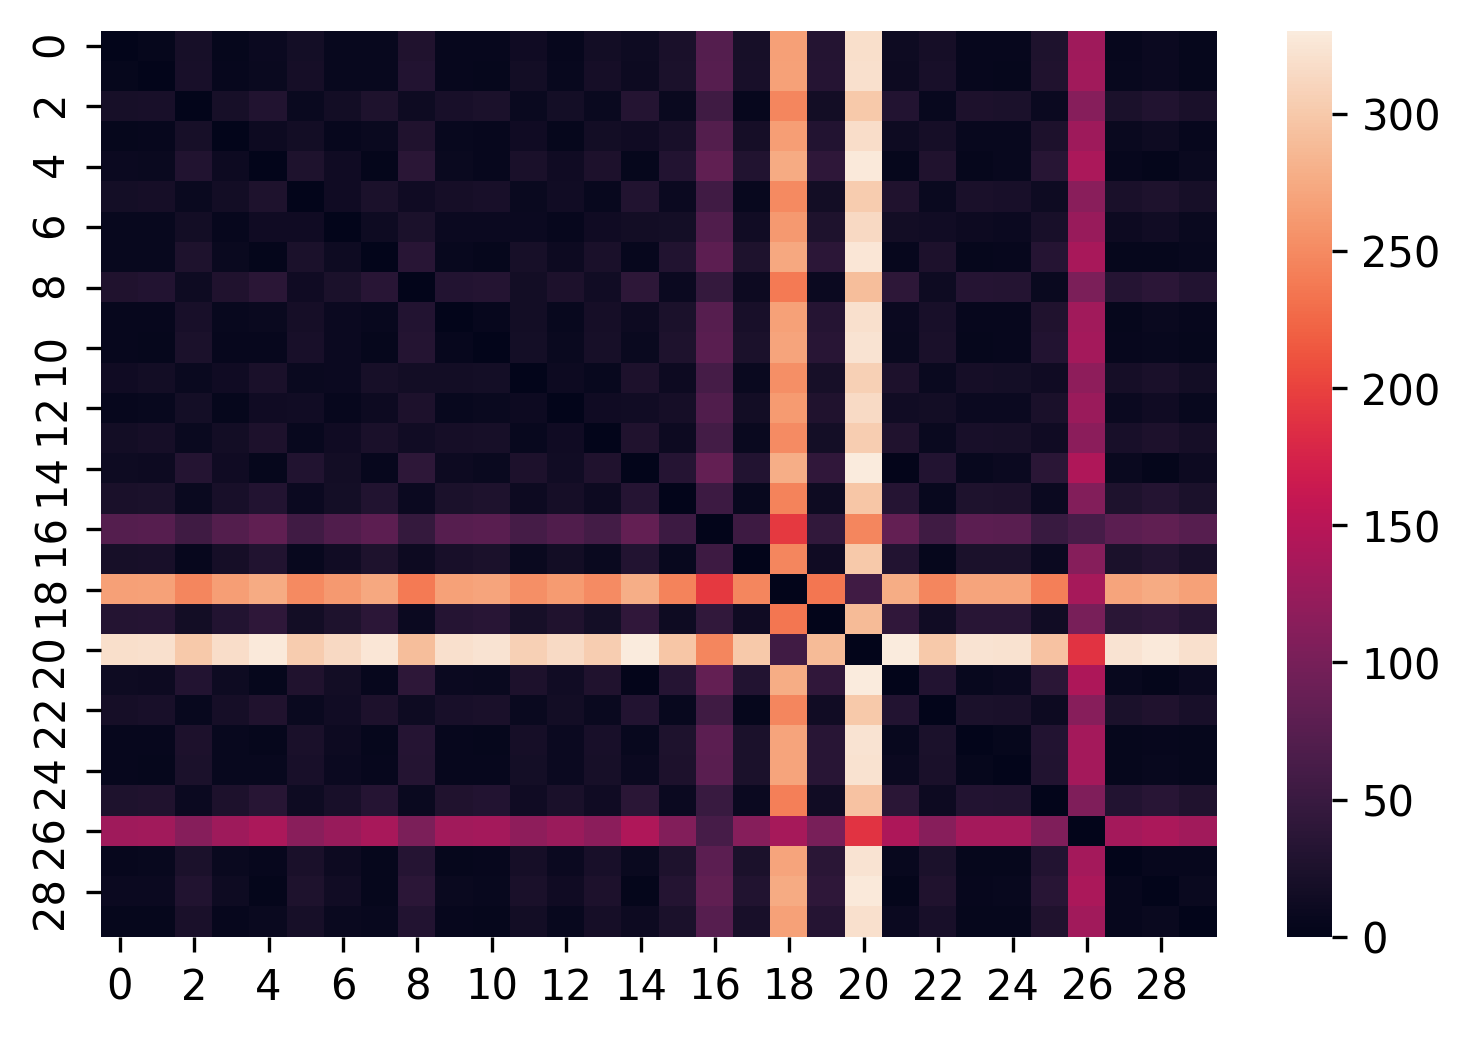

In [57]:
import seaborn as sns
sns.heatmap(distances)

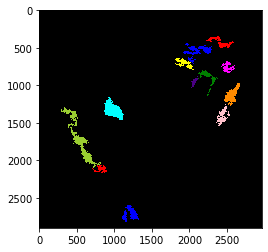

In [33]:
plt.imshow(label2rgb(scilabel(remove_small_objects(~mask1 & fill_holes(mask1),1500))[0],bg_label=0) )

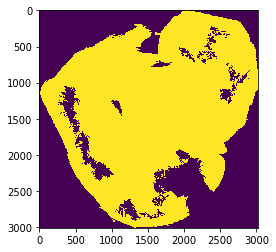

In [5]:

plt.imshow(mask2)

In [32]:
import glob
masks=[]
files=glob.glob("bcc/interactive_test/163_A1*.img.*.png")
print(len(files))
for f in files:
    print(f)
    masks.append(generate_tissue_mask(cv2.resize(skimage.io.imread(f),None,fx=1./downsample,fy=1./downsample),compression=compression,threshold=threshold, keep_holes=False, max_hole_size=8000))

6
bcc/interactive_test/163_A1a.img.0.png
bcc/interactive_test/163_A1c.img.0.png
bcc/interactive_test/163_A1b.img.0.png
bcc/interactive_test/163_A1b.img.1.png
bcc/interactive_test/163_A1a.img.1.png
bcc/interactive_test/163_A1c.img.1.png


In [33]:
point_clouds=[np.vstack(np.where(x)).T for x in masks]

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

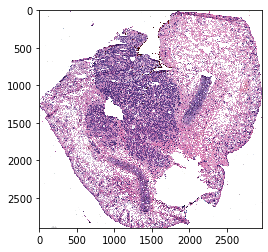

In [28]:
plt.imshow(im1)

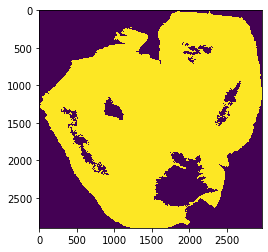

In [27]:
plt.imshow(mask1)

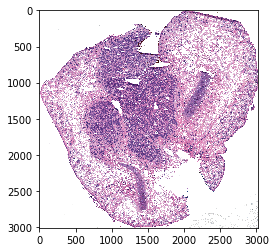

In [18]:
plt.imshow(im2)

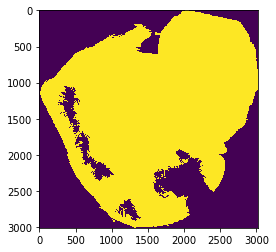

In [26]:
plt.imshow(mask2)

In [19]:
1-mask2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [22]:
from sklearn.preprocessing import minmax_scale

n_pts    = 3000   # number of points in the point clouds


pt_cloud=minmax_scale(np.vstack(np.where(mask1)).T.astype(np.float32))
pt_cloud2=minmax_scale(np.vstack(np.where(mask2)).T.astype(np.float32))



# pt_cloud=toy_data = np.random.rand(300, 2).astype(np.float32)
# pt_cloud=pt_cloud#[::3000,:]
np.random.seed(42)
idx=np.random.choice(np.arange(len(pt_cloud)),n_pts,replace=False)
idx2=np.random.choice(np.arange(len(pt_cloud2)),n_pts,replace=False)

# X = tf.Variable(initial_value=pt_cloud[idx], trainable=True)

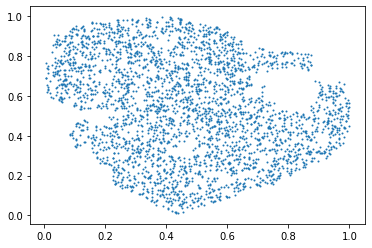

In [23]:
import matplotlib.pyplot as plt
plt.scatter(pt_cloud[idx,0],pt_cloud[idx,1],s=1)

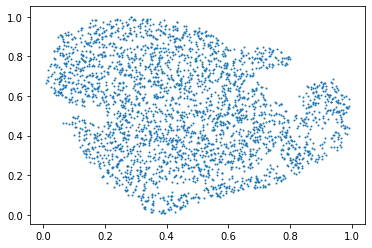

In [24]:
plt.scatter(pt_cloud2[idx2,0],pt_cloud2[idx2,1],s=1)

In [36]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_diagram, plot_point_cloud, plot_heatmap
# pt_clouds=[pt_cloud,pt_cloud2]
X2=[]
for i in range(6):
    idx=np.random.choice(np.arange(len(point_clouds[i])),3000,replace=False)
    X2.append(point_clouds[i][idx])
    
diagrams=VietorisRipsPersistence().fit_transform(X2)

# plot_diagram(diagrams[0])
# plot_diagram(diagrams[1])

# plot_diagram(diagrams[1])

In [45]:
plot_diagram(diagrams[4])

In [52]:
from gtda.diagrams import PairwiseDistance
pair_dist=PairwiseDistance()

In [53]:
distances=pair_dist.fit_transform(diagrams)

/home/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



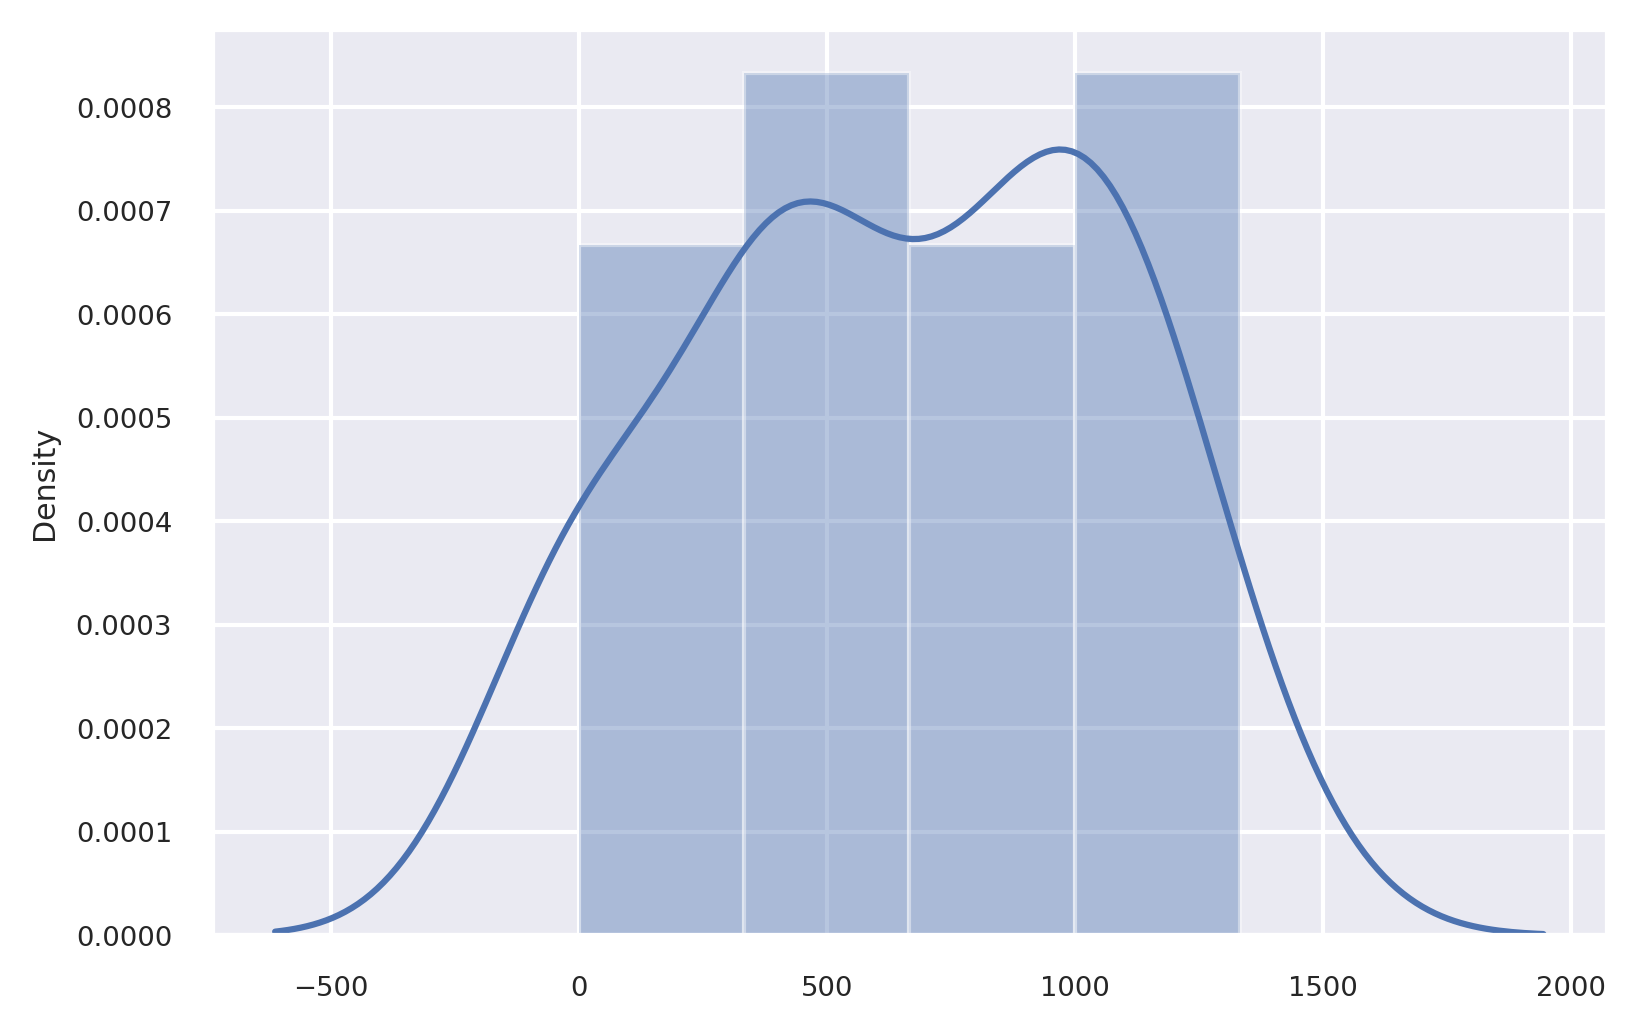

In [56]:
import seaborn as sns, pandas as pd
sns.distplot(distances.flatten())

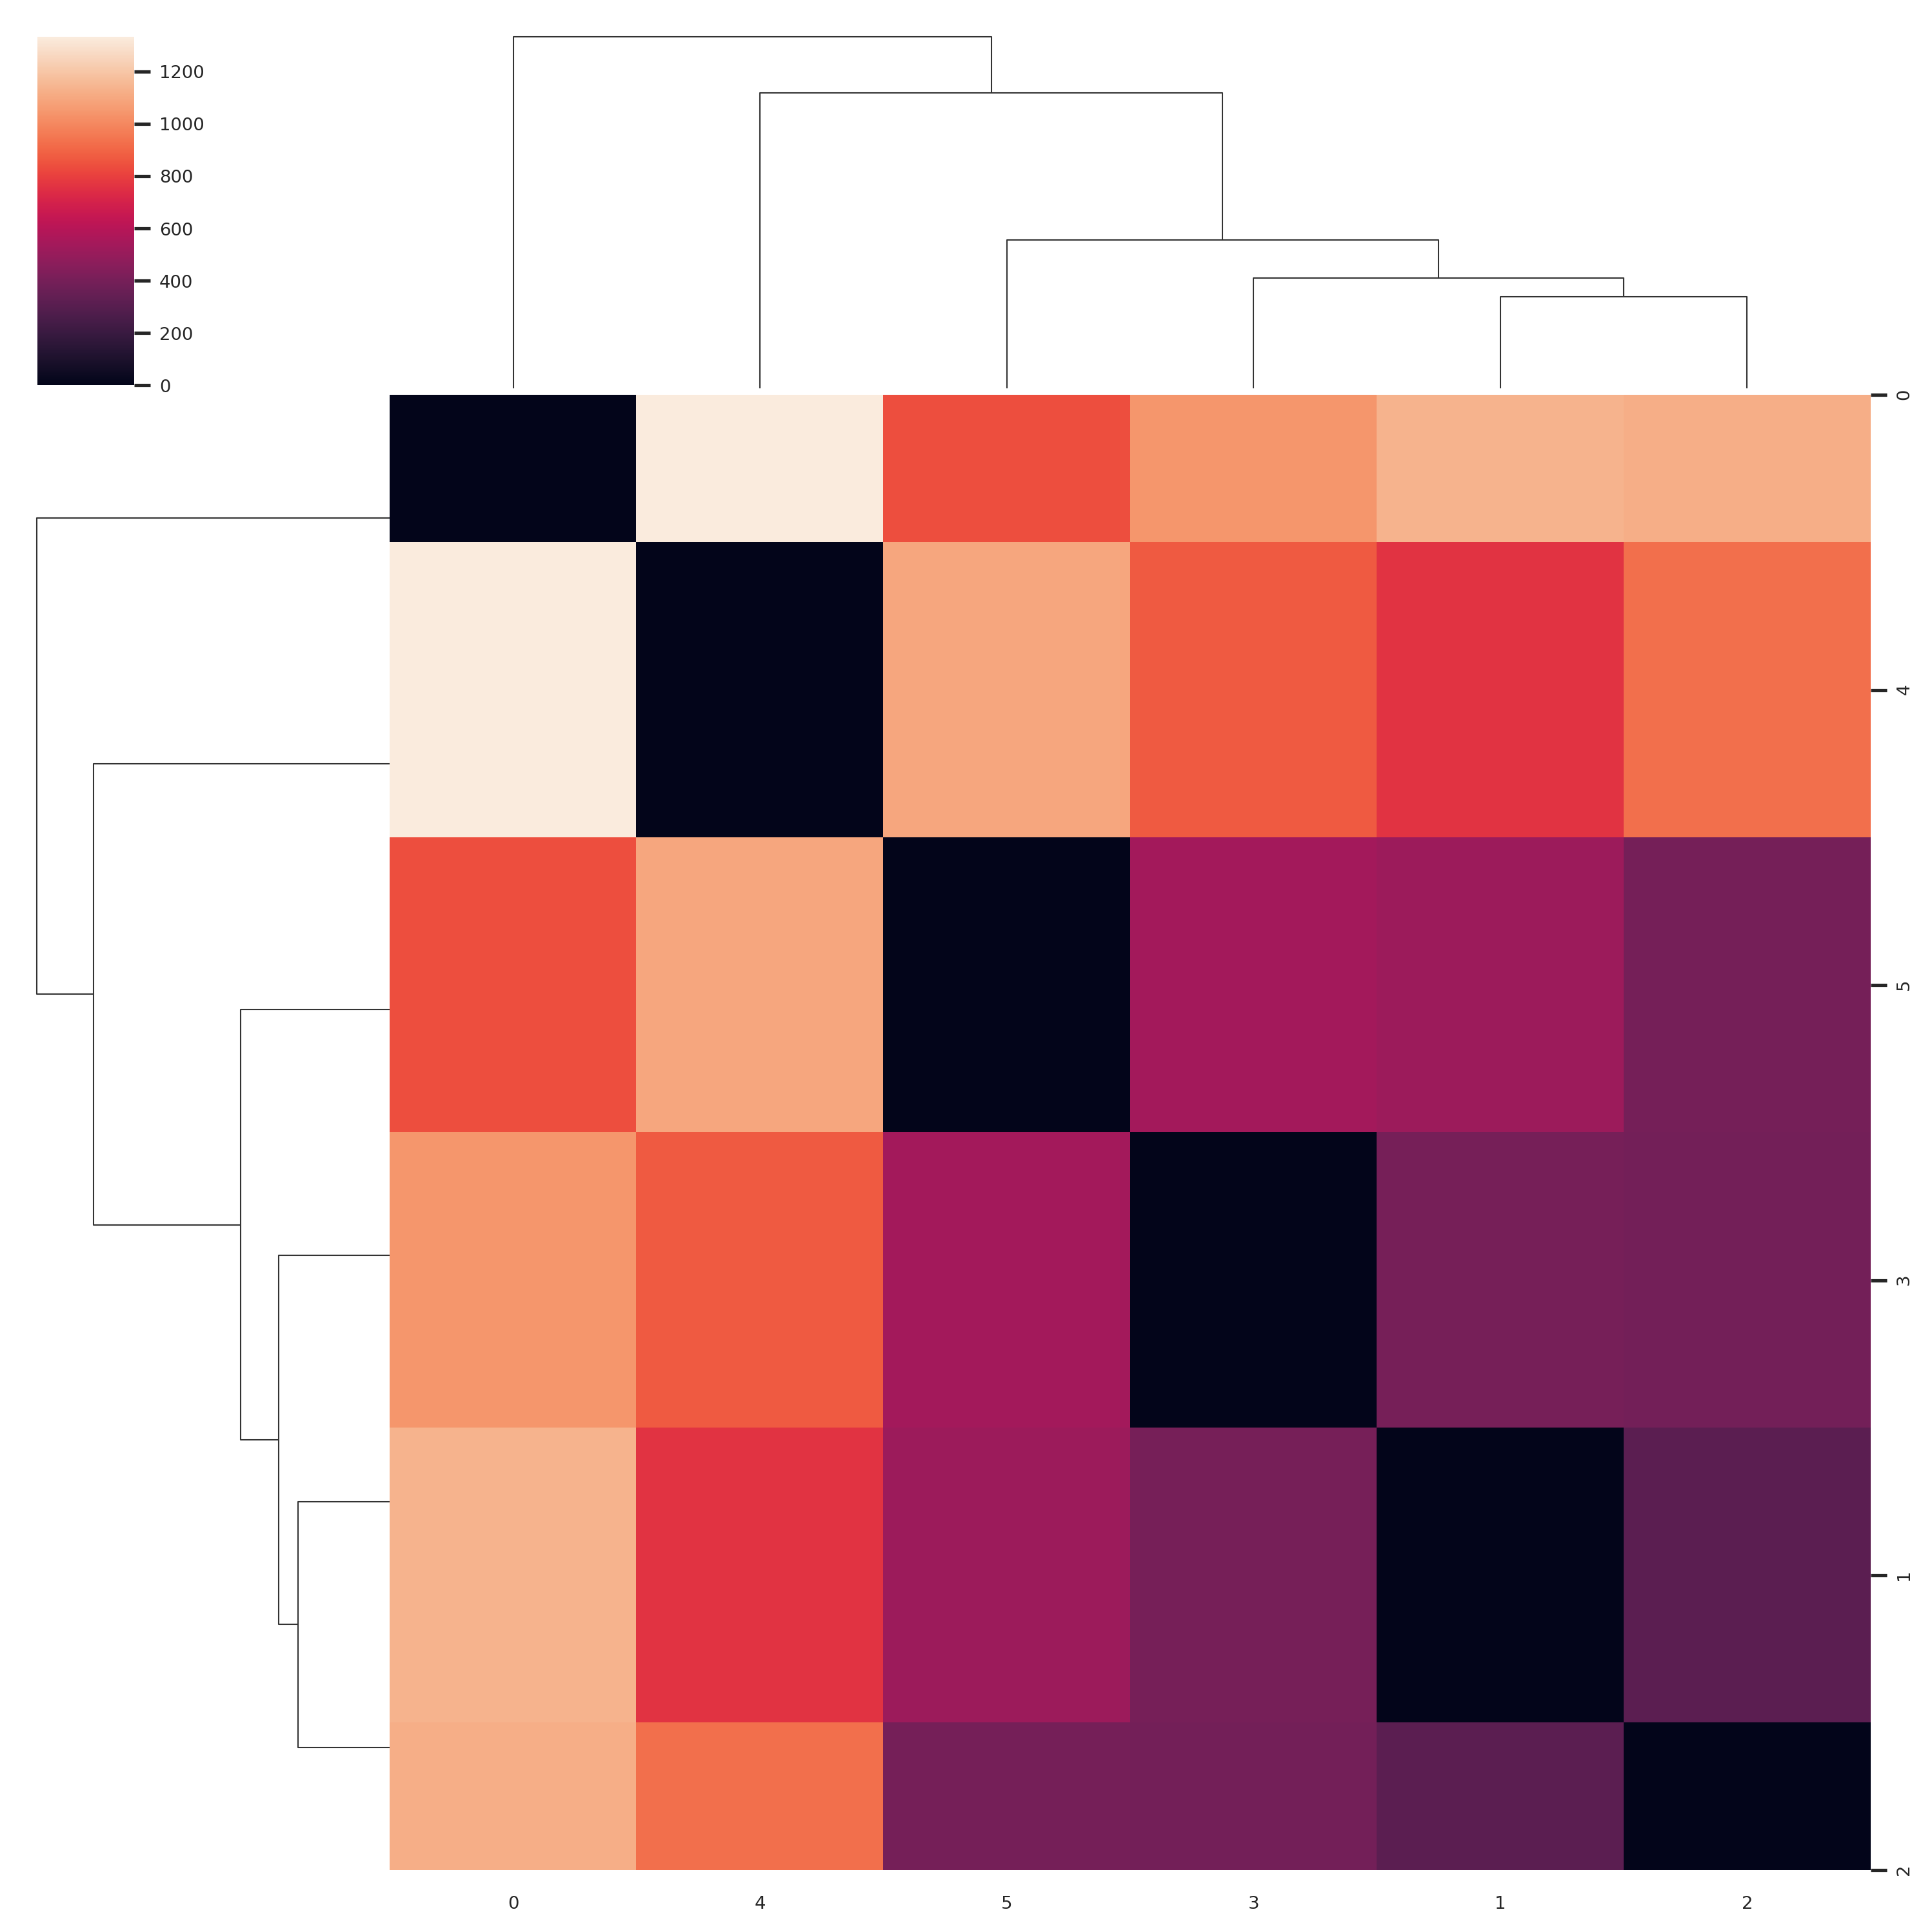

In [54]:
import matplotlib
matplotlib.rcParams['figure.dpi']=300
sns.set(font_scale=0.6)
from sklearn.metrics import pairwise_distances
sns.clustermap(distances)
# plt.xticks.label()
# ids=(point_clouds['slide']+"_"+point_clouds['component'].astype(str)).values[:n_clouds]
# current_palette = sns.color_palette()
# colors=pd.DataFrame(point_clouds['incomplete'].map(lambda x: current_palette[int(x)]).values[:n_clouds],index=ids)
# sns.clustermap(pd.DataFrame(pairwise_distances(np.hstack([X_train0,X_train2])),columns=ids,index=ids),row_colors=colors)

In [4]:
# https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-optimization.ipynb

In [65]:
def Rips(DX, mel, dim, card):
    # Parameters: DX (distance matrix), 
    #             mel (maximum edge length for Rips filtration), 
    #             dim (homological dimension), 
    #             card (number of persistence diagram points, sorted by distance-to-diagonal)

    # Compute the persistence pairs with Gudhi
    rc = gd.RipsComplex(distance_matrix=DX, max_edge_length=mel)
    st = rc.create_simplex_tree(max_dimension=dim+1)
    dgm = st.persistence()
    pairs = st.persistence_pairs()

    # Retrieve vertices v_a and v_b by picking the ones achieving the maximal
    # distance among all pairwise distances between the simplex vertices
    indices, pers = [], []
#     print(DX)
    for s1, s2 in pairs:
        if len(s1) == dim+1:
            l1, l2 = np.array(s1), np.array(s2)
#             print(l1,l2)
            i1 = [s1[v] for v in np.unravel_index(np.argmax(DX[l1,:][:,l1]),[len(s1), len(s1)])]
            i2 = [s2[v] for v in np.unravel_index(np.argmax(DX[l2,:][:,l2]),[len(s2), len(s2)])]
            indices += i1
            indices += i2
            pers.append(st.filtration(s2) - st.filtration(s1))
    
    # Sort points with distance-to-diagonal
    perm = np.argsort(pers)
    indices = list(np.reshape(indices, [-1,4])[perm][::-1,:].flatten())
    
    # Output indices
    indices = indices[:4*card] + [0 for _ in range(0,max(0,4*card-len(indices)))]
    return list(np.array(indices, dtype=np.int32))

In [66]:
class RipsModel(tf.keras.Model):
    def __init__(self, X, mel=12, dim=1, card=50):
        super(RipsModel, self).__init__()
        self.X = X
        self.mel = mel
        self.dim = dim
        self.card = card
        
    def call(self):
        m, d, c = self.mel, self.dim, self.card
        
        # Compute distance matrix
        DX = tfa.losses.metric_learning.pairwise_distance(self.X)
        DXX = tf.reshape(DX, [1, DX.shape[0], DX.shape[1]])
        
        # Turn numpy function into tensorflow function
        RipsTF = lambda DX: tf.numpy_function(Rips, [DX, m, d, c], [tf.int32 for _ in range(4*c)])
        
        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        ids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(RipsTF,DXX,dtype=[tf.int32 for _ in range(4*c)]))
        
        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        dgm = tf.reshape(tf.gather_nd(DX, tf.reshape(ids, [2*c,2])), [c,2])
        return dgm

In [67]:
card     = 30    # max number of points in the diagrams # control number of holes
hom      = 1     # homological dimension
ml       = 0.5   # max distance in Rips
n_epochs = 30    # number of optimization steps


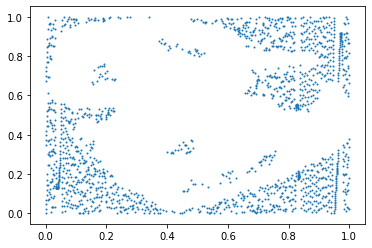

In [68]:
import matplotlib.pyplot as plt
plt.scatter(pt_cloud[::2000,0],pt_cloud[::2000,1],s=1)

In [ ]:
seed=42
np.random.seed(seed) # do repeat sampling and ensemble to verify
all_idx=[]
movement=np.zeros(len(pt_cloud))

for i in range(10):
    seed+=1
    np.random.seed(seed)
    
    idx=np.random.choice(np.arange(len(pt_cloud)),n_pts,replace=False)
    all_idx.extend(idx.tolist())
    X = tf.Variable(initial_value=pt_cloud[idx], trainable=True)

    with tf.device('/GPU:0'):

        model = RipsModel(X=X, mel=ml, dim=hom, card=card)
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

        for epoch in range(n_epochs+1):
#             print(epoch)

            with tf.GradientTape() as tape:

                # Compute persistence diagram
                dgm = model.call()

                # Loss is sum of squares of distances to the diagonal
                loss = -tf.math.reduce_sum(tf.square(.5*(dgm[:,1]-dgm[:,0])))#-tf.math.reduce_sum(tf.square(dgm[:,0]))#-0.1

            # Compute and apply gradients
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            if epoch % 30 == 0:
                plt.figure()
                plt.scatter(model.X.numpy()[:,0], model.X.numpy()[:,1])
                plt.title("Point cloud at epoch " + str(epoch))
                plt.show()

    X_npy=X.numpy()
    movement[idx]=(np.abs(pt_cloud[idx]-X_npy)**2).sum(1)
idx=np.array(list(set(all_idx)))

In [15]:
idx=np.array(list(set(all_idx)))

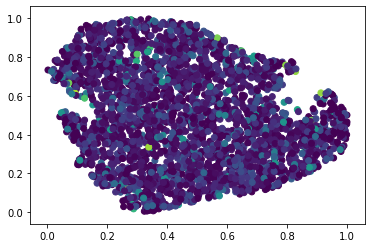

In [16]:
import matplotlib.pyplot as plt
plt.scatter(pt_cloud[idx,0],pt_cloud[idx,1],c=movement[idx]) # to ID which points were pulled apart

In [60]:
# maybe average persistence images?

In [61]:
# movement[::2000]*1000

In [ ]:
# calculate displacement between old point and new point to see if deformed into shape

In [ ]:
# ! pip install tensorflow-gpu
# https://github.com/c-hofer/torchph

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# ! pip install git+https://github.com/c-hofer/torchph

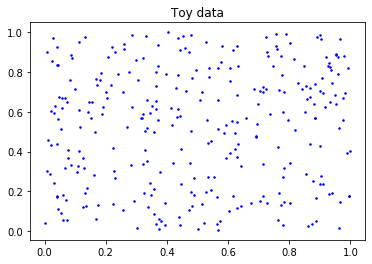

In [6]:
np.random.seed(1234)
toy_data = np.random.rand(300, 2)

plt.figure()
plt.plot(toy_data[:, 0], toy_data[:, 1], 'b.', markersize=3)
plt.title('Toy data');

In [9]:
import torch
from torchph.pershom import vr_persistence_l1, vr_persistence

device='cuda'
X = torch.tensor(
    toy_data.astype(np.float32),
    device=device,
    requires_grad=True,)
#     dtype=torch.float32)

opt = torch.optim.Adam([X], lr=0.01)

for i in range(1,100+1):
    print(X)
    pers = vr_persistence_l1(X, 1, 0)
    h_0 = pers[0][0]

    lt = h_0[:, 1] # H0 lifetimes
    loss = (lt - 0.1).abs().sum()

    if i % 20 == 0 or i == 1:
        print('Iteration: {:3d} | Loss: {:.2f}'.format(i, loss.item()))

    opt.zero_grad()
    loss.backward()
    opt.step()

X = X.cpu().detach().numpy()
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'b.');

tensor([[0.1915, 0.6221],
        [0.4377, 0.7854],
        [0.7800, 0.2726],
        [0.2765, 0.8019],
        [0.9581, 0.8759],
        [0.3578, 0.5010],
        [0.6835, 0.7127],
        [0.3703, 0.5612],
        [0.5031, 0.0138],
        [0.7728, 0.8826],
        [0.3649, 0.6154],
        [0.0754, 0.3688],
        [0.9331, 0.6514],
        [0.3972, 0.7887],
        [0.3168, 0.5681],
        [0.8691, 0.4362],
        [0.8021, 0.1438],
        [0.7043, 0.7046],
        [0.2188, 0.9249],
        [0.4421, 0.9093],
        [0.0598, 0.1843],
        [0.0474, 0.6749],
        [0.5946, 0.5333],
        [0.0433, 0.5614],
        [0.3297, 0.5030],
        [0.1119, 0.6072],
        [0.5659, 0.0068],
        [0.6174, 0.9121],
        [0.7905, 0.9921],
        [0.9588, 0.7920],
        [0.2853, 0.6249],
        [0.4781, 0.1957],
        [0.3823, 0.0539],
        [0.4516, 0.9820],
        [0.1239, 0.1194],
        [0.7385, 0.5873],
        [0.4716, 0.1071],
        [0.2292, 0.9000],
        [0.4

AssertionError: 

In [24]:
! git clone https://github.com/c-hofer/torchph.git

Cloning into 'torchph'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2160 (delta 6), reused 10 (delta 1), pack-reused 2129
Receiving objects: 100% (2160/2160), 7.53 MiB | 24.03 MiB/s, done.
Resolving deltas: 100% (1123/1123), done.
Checking out files: 100% (175/175), done.


In [25]:
! conda develop /tmp/torchph


Error: environment does not exist: /dartfs-hpc/rc/lab/V/VaickusL/anaconda_installation
#
# Use 'conda create' to create the environment first.
#
